<span style="font-size:30px; color:midnightblue;margin-left:130px;">&ldquo; PCA on IRIS dataset &rdquo;<span>

&nbsp;&nbsp; <a src="https://spotle.ai/Karthikchiranjeevi>https://spotle.ai/Karthikchiranjeevi" style="text-decoration:none; color:maroon; font-size:18px; font-family: 'Roboto'; margin-left:150px;">https://spotle.ai/Karthikchiranjeevi</a>


<blockquote style="font-size:16px;">
Principal component analysis is a dimensionality reduction technique.<br>
According to the wikipedia :<br><br>
    " Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables. " </blockquote>

## 1.0 Importing the necessary libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 1.1 Importing the data

In [22]:
iris = datasets.load_iris()
#https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
data = data.astype({"target": int})

## 1.2 Understanding the high level details of the dataset

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


## 1.3 Understanding the features 

### 1.3.1 Analyzing the Sepal length feature

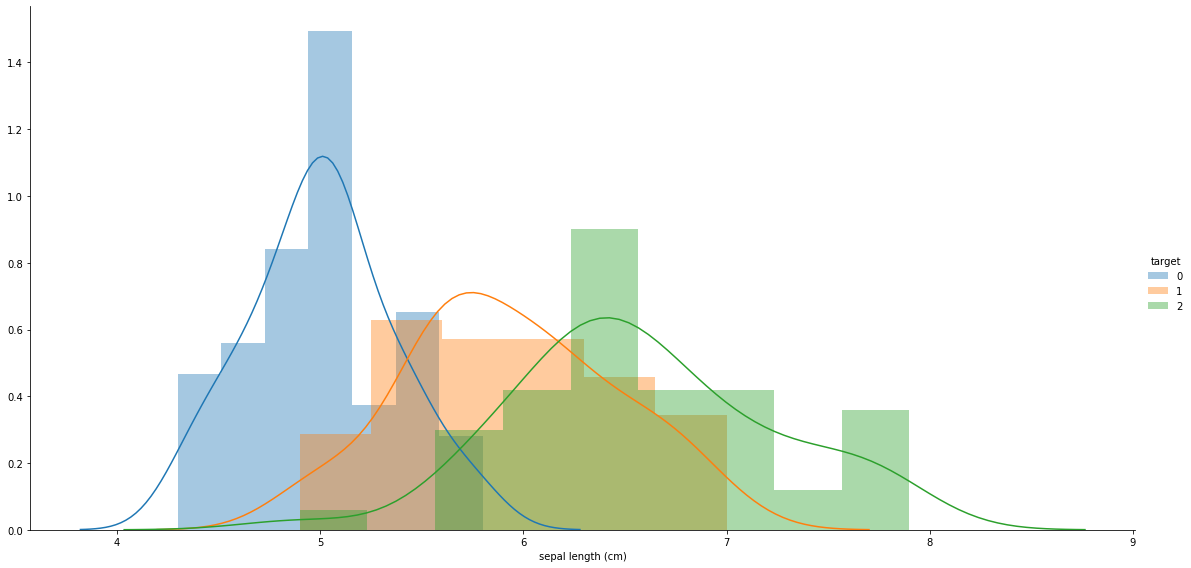

In [25]:
sns.FacetGrid(data=data,hue="target",height=8,aspect=2).map(sns.distplot,"sepal length (cm)").add_legend()

### 1.3.2 Analyzing the sepal width feature

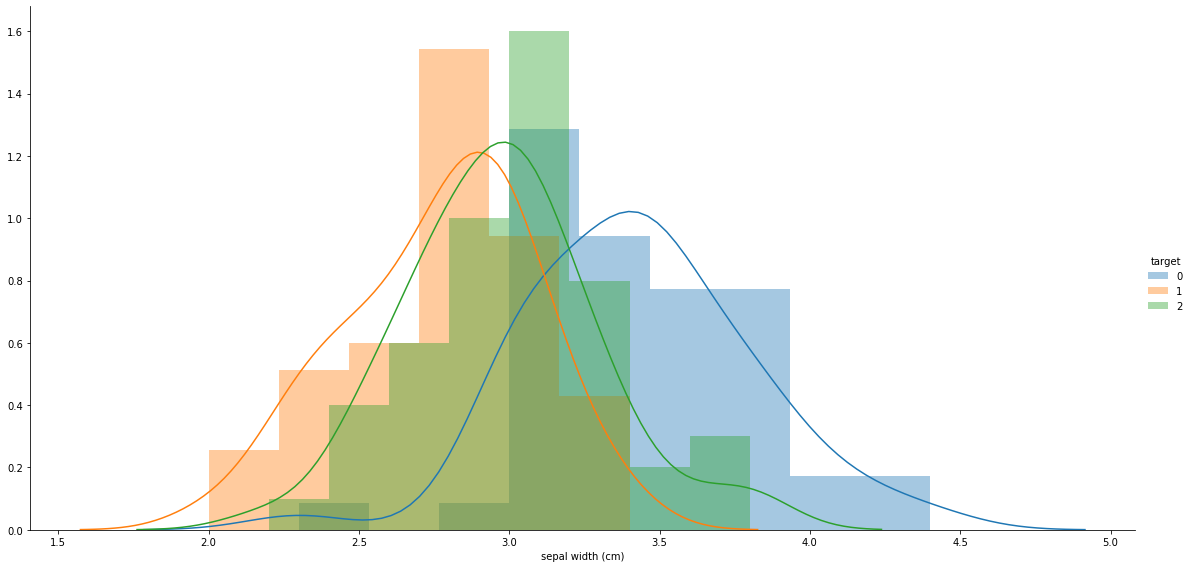

In [26]:
sns.FacetGrid(data=data,hue="target",height=8,aspect=2).map(sns.distplot,"sepal width (cm)").add_legend()

### 1.3.3 Analyzing the Petal length feature

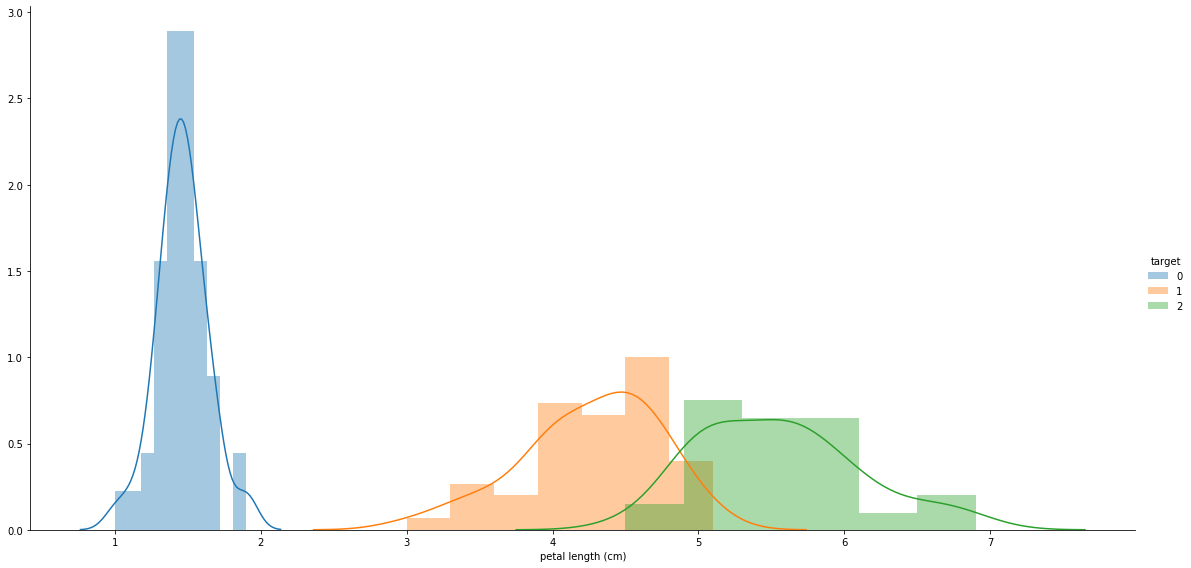

In [27]:
sns.FacetGrid(data=data,hue="target",height=8,aspect=2).map(sns.distplot,"petal length (cm)").add_legend()

<blockquote style="font-size:17px; color:maroon;">
    if (petal_length < 2.1) and (petal_length > 0) : <br>
        then class = 0<br><br>
    " From this we can clearly understand that petal length is enough to distinguish the class 0 points alone."
</blockquote>

### 1.3.4 Analyzing the Petal width feature

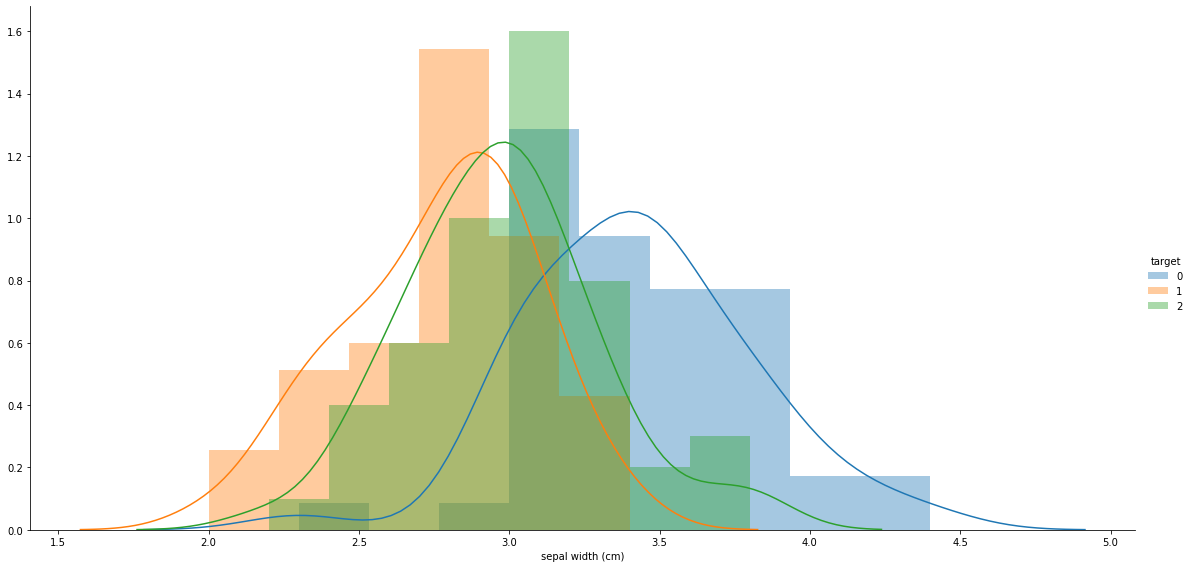

In [28]:
sns.FacetGrid(data=data,hue="target",height=8,aspect=2).map(sns.distplot,"sepal width (cm)").add_legend()

### 1.3.5 Analyzing the target labels

Points with class label -> 0 are =  33.33333333333333 %
Points with class label -> 1 are =  33.33333333333333 %
Points with class label -> 2 are =  33.33333333333333 %


([<matplotlib.patches.Wedge at 0x7f1563540208>,
 [Text(0.5499999702695115, 0.9526279613277875, '0'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '1'),
  Text(0.5500001486524352, -0.9526278583383436, '2')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

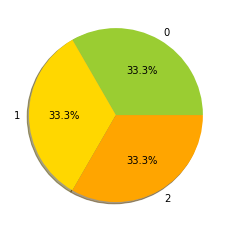

In [30]:
class_label = data['target'].value_counts()
total_points = len(data)
print("Points with class label -> 0 are = ",class_label.values[0]/total_points*100,"%")
print("Points with class label -> 1 are = ",class_label.values[1]/total_points*100,"%")
print("Points with class label -> 2 are = ",class_label.values[2]/total_points*100,"%")
labels = ['0','1','2']
sizes = [33,33,33]
colors = ['yellowgreen', 'gold','orange']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

### 1.3.6 Correlation between the features

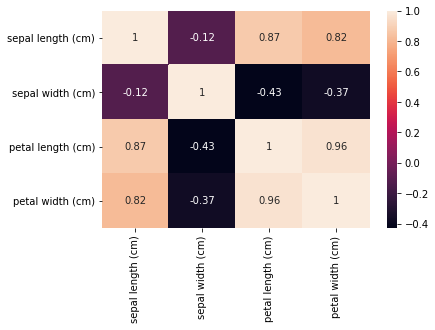

In [34]:
corr = data.drop(['target'],axis=1).corr()
sns.heatmap(corr,annot=True)

### 1.3.7 Pair plot of the features

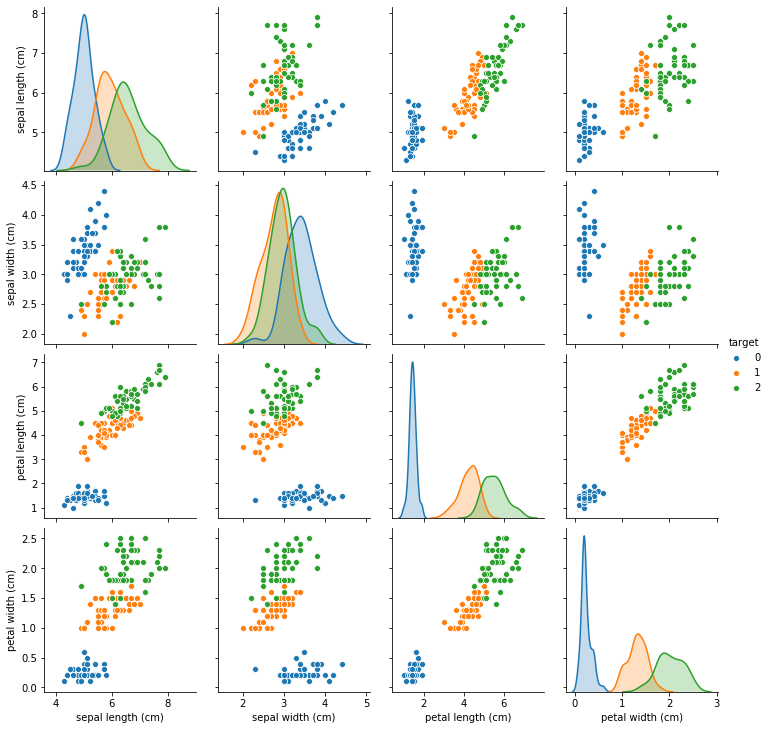

In [41]:
sns.pairplot(data,hue="target")

## 1.4 PCA

In [46]:
# Dividing the data into x and y
x = data.drop(['target'],axis=1)
y= data['target']

<h3>Standardizing the features </h3>

<blockquote style="font-size:17px;color:red">Standardizing is a requirement for machine learning algorithms to make them work computationally efficient. Decision trees are exceptions because we expect the model to be interpretable.</blockquote>

In [48]:
xstd = StandardScaler().fit_transform(x)

<h3>Apllying the PCA</h3>

In [59]:
pca = PCA(n_components=4)
pca.fit(xstd)
features = pca.transform(xstd)

## 1.5  Interpreting the output of PCA

In [60]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

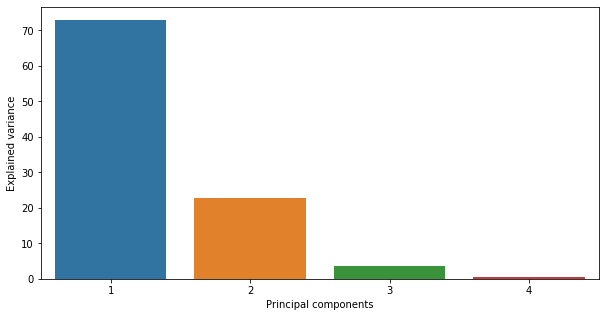

In [85]:
explained_variance_ratio = [72.962,22.850,3.668,0.517]
no_principal_components=[1,2,3,4]
plt.figure(figsize=(10,5))
plt.xlabel("Principal components")
plt.ylabel('Explained variance')
ev = sns.barplot(x=no_principal_components,y=explained_variance_ratio)

<blockquote style="font-size:17px;color:brown">As we can see from the above plot (The explained variance is calculated from eigen values internally) :
<ul>
    <li>The first component covers 72.962% of the original data`s information with a loss of ~ 28%.</li>
    <li>The second component covers 22.850% of the original data`s information with a loss of ~ 78%.</li>
    <li>Both the first and second principal components are enough to cover ~ 95% with a loss of ~ 5%.</li>
    <li>The third and fourth components can be safely ignored because they only contribute to ~3% and 0.5% of original data`s information.</li>
  </ul></blockquote>

## 1.6 Plotting the 2 principal components with maximum variance 

In [86]:
pca = PCA(n_components=2)
pca.fit(xstd)
features = pca.transform(xstd)

In [97]:
pca_output = pd.DataFrame(features,columns=['principal component 1','principal component 2']) 
pca_output['target'] = data['target']

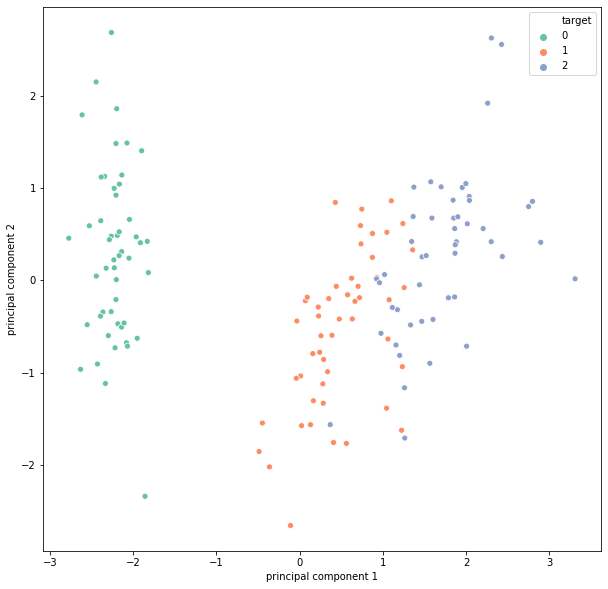

In [104]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_output,x='principal component 1',y='principal component 2',hue='target',palette="Set2")

<blockquote style="color:red;font-size:17px;">The output of the linear PCA is the new features with maximum variance on the new feature axis.</blockquote>